# Calculating topographic factors from vtm

Define S1 probes

In [13]:
from cfdmod.use_cases.s1.probe import S1Probe
import pathlib

field_data_path = pathlib.Path("./fixtures/tests/s1/vtm/example.vtm") 

pitot_probe = S1Probe(p1=[1,10,1], p2=[1,10,40], numPoints=1000)
example_probe = S1Probe(p1=[10,10,1], p2=[10,10,40], numPoints=1000)

pitot_probe, example_probe

(S1Probe(p1=[1.0, 10.0, 1.0], p2=[1.0, 10.0, 40.0], numPoints=1000),
 S1Probe(p1=[10.0, 10.0, 1.0], p2=[10.0, 10.0, 40.0], numPoints=1000))

Extract data from multiblock dataset

In [14]:
from cfdmod.api.vtk.probe_vtm import read_vtm, create_line, probe_over_line, get_array_from_filter

reader = read_vtm(field_data_path)

pitot_line = create_line(pitot_probe.p1, pitot_probe.p2, pitot_probe.numPoints - 1)
probe_line = create_line(example_probe.p1, example_probe.p2, example_probe.numPoints - 1)

pitot_filter = probe_over_line(pitot_line, reader)
probe_filter = probe_over_line(probe_line, reader)

pitot_data = get_array_from_filter(pitot_filter, array_lbl="ux")
probe_data = get_array_from_filter(probe_filter, array_lbl="ux")

pitot_data[:10], probe_data[:10]

(array([-0.00102558, -0.00102558, -0.00102558, -0.00102558, -0.00102558,
        -0.00102558, -0.00102558, -0.00102558, -0.00102558, -0.00102558],
       dtype=float32),
 array([0.00672358, 0.00672358, 0.00672358, 0.00672358, 0.00672358,
        0.00672358, 0.00672358, 0.00672358, 0.00672358, 0.00672358],
       dtype=float32))

Create profiles from extracted data

In [18]:
from cfdmod.use_cases.s1.profile import Profile
import numpy as np

pitot_pos = np.linspace(pitot_probe.p1[2], pitot_probe.p2[2], pitot_probe.numPoints)
probe_pos = np.linspace(example_probe.p1[2], example_probe.p2[2], example_probe.numPoints)

pitot_profile = Profile(pos=pitot_pos, values=pitot_data, label="Pitot")
probe_profile = Profile(pos=probe_pos, values=probe_data, label="Example probe")

pitot_profile.smoothen_values()    
probe_profile.smoothen_values()    

s1_profile = probe_profile / pitot_profile

Plotting Velocity Profiles extracted

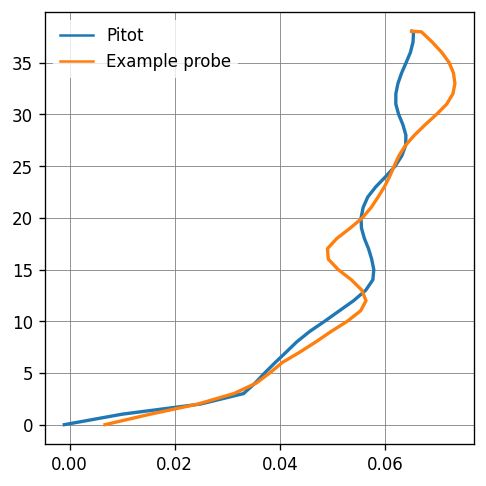

In [19]:
import matplotlib.pyplot as plt
from cfdmod.use_cases.s1.plotting import set_style_tech

fig, ax = plt.subplots(figsize=(10 / 2.54, 10 / 2.54), constrained_layout=True, dpi=120)

ax.plot(pitot_profile.values, pitot_profile.pos, label=pitot_profile.label)
ax.plot(probe_profile.values, probe_profile.pos, label=probe_profile.label)
ax.legend()

set_style_tech(ax)

plt.show(fig)

Plotting S1

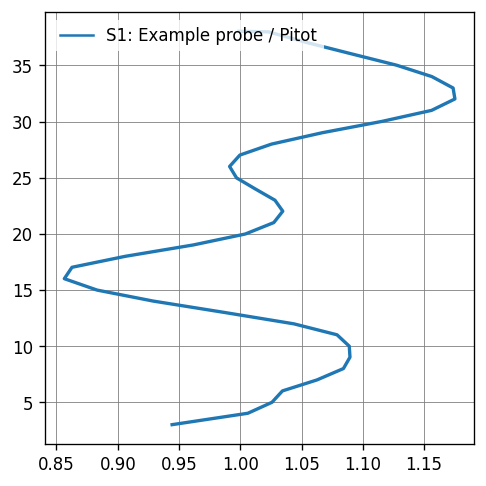

In [20]:
fig, ax = plt.subplots(figsize=(10 / 2.54, 10 / 2.54), constrained_layout=True, dpi=120)

ax.plot(s1_profile.values[2:], s1_profile.pos[2:], label=s1_profile.label)

# ax.legend(bbox_to_anchor=(1.2, 1))
ax.legend(loc='upper left')

set_style_tech(ax)
plt.show(fig)